<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bottom-Up-Supply-Model" data-toc-modified-id="Bottom-Up-Supply-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bottom Up Supply Model</a></span><ul class="toc-item"><li><span><a href="#Simplified-Model" data-toc-modified-id="Simplified-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simplified Model</a></span></li><li><span><a href="#Functional-Response" data-toc-modified-id="Functional-Response-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functional Response</a></span><ul class="toc-item"><li><span><a href="#Mass-Specific-Functional-Response" data-toc-modified-id="Mass-Specific-Functional-Response-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Mass Specific Functional Response</a></span></li></ul></li><li><span><a href="#Loss" data-toc-modified-id="Loss-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Loss</a></span></li></ul></li><li><span><a href="#Functional-Response" data-toc-modified-id="Functional-Response-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functional Response</a></span><ul class="toc-item"><li><span><a href="#No-Resource-Fluctuation" data-toc-modified-id="No-Resource-Fluctuation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>No Resource Fluctuation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Search-rate-with-increasing-mass" data-toc-modified-id="Search-rate-with-increasing-mass-2.1.0.1"><span class="toc-item-num">2.1.0.1&nbsp;&nbsp;</span>Search rate with increasing mass</a></span></li><li><span><a href="#Handling-Time-with-increasing-mass" data-toc-modified-id="Handling-Time-with-increasing-mass-2.1.0.2"><span class="toc-item-num">2.1.0.2&nbsp;&nbsp;</span>Handling Time with increasing mass</a></span></li></ul></li><li><span><a href="#Fluctuating-Resources" data-toc-modified-id="Fluctuating-Resources-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Fluctuating Resources</a></span></li></ul></li></ul></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parameters</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#No-fluctuation-in-R(t)" data-toc-modified-id="No-fluctuation-in-R(t)-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>No fluctuation in R(t)</a></span></li><li><span><a href="#Adding-Fluctuation-for-R(t)" data-toc-modified-id="Adding-Fluctuation-for-R(t)-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Adding Fluctuation for R(t)</a></span><ul class="toc-item"><li><span><a href="#Different-periods-and-amplitudes" data-toc-modified-id="Different-periods-and-amplitudes-3.0.2.1"><span class="toc-item-num">3.0.2.1&nbsp;&nbsp;</span>Different periods and amplitudes</a></span></li><li><span><a href="#Constant-Period" data-toc-modified-id="Constant-Period-3.0.2.2"><span class="toc-item-num">3.0.2.2&nbsp;&nbsp;</span>Constant Period</a></span></li></ul></li><li><span><a href="#Considerations-about-fluctuation" data-toc-modified-id="Considerations-about-fluctuation-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Considerations about fluctuation</a></span></li></ul></li></ul></li><li><span><a href="#Metabolic-Cost" data-toc-modified-id="Metabolic-Cost-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metabolic Cost</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Unit-Conversion-Table" data-toc-modified-id="Unit-Conversion-Table-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Unit Conversion Table</a></span></li><li><span><a href="#As-proportion-on-Effective-Intake-rate" data-toc-modified-id="As-proportion-on-Effective-Intake-rate-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>As proportion on Effective Intake rate</a></span><ul class="toc-item"><li><span><a href="#Plots-vs-effective-consumption" data-toc-modified-id="Plots-vs-effective-consumption-4.0.2.1"><span class="toc-item-num">4.0.2.1&nbsp;&nbsp;</span>Plots vs effective consumption</a></span></li><li><span><a href="#Plot-with-empirical-estimate" data-toc-modified-id="Plot-with-empirical-estimate-4.0.2.2"><span class="toc-item-num">4.0.2.2&nbsp;&nbsp;</span>Plot with empirical estimate</a></span></li><li><span><a href="#Including-functional-response" data-toc-modified-id="Including-functional-response-4.0.2.3"><span class="toc-item-num">4.0.2.3&nbsp;&nbsp;</span>Including functional response</a></span></li></ul></li><li><span><a href="#Estimating-Metabolic-rate-from-data" data-toc-modified-id="Estimating-Metabolic-rate-from-data-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Estimating Metabolic rate from data</a></span><ul class="toc-item"><li><span><a href="#Conversion-Factor" data-toc-modified-id="Conversion-Factor-4.0.3.1"><span class="toc-item-num">4.0.3.1&nbsp;&nbsp;</span>Conversion Factor</a></span></li><li><span><a href="#Dimensional-Analysis" data-toc-modified-id="Dimensional-Analysis-4.0.3.2"><span class="toc-item-num">4.0.3.2&nbsp;&nbsp;</span>Dimensional Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Barneche-et-al-2014" data-toc-modified-id="Barneche-et-al-2014-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><a href="https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1111%2Fele.12309&amp;file=ele12309-sup-0001-Supinfo.pdf" target="_blank">Barneche et al 2014</a></a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Plotting-Cost-with-Mass" data-toc-modified-id="Plotting-Cost-with-Mass-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Plotting Cost with Mass</a></span></li></ul></li><li><span><a href="#Varying-Metabolic-Cost" data-toc-modified-id="Varying-Metabolic-Cost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Varying Metabolic Cost</a></span></li><li><span><a href="#Reproductive-Cost" data-toc-modified-id="Reproductive-Cost-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Reproductive Cost</a></span></li></ul></li><li><span><a href="#Abundant-Resource-Growth" data-toc-modified-id="Abundant-Resource-Growth-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Abundant Resource Growth</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li><li><span><a href="#Scarce-Resource-Growth" data-toc-modified-id="Scarce-Resource-Growth-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scarce Resource Growth</a></span><ul class="toc-item"><li><span><a href="#Parameters-(Initial)" data-toc-modified-id="Parameters-(Initial)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Parameters (Initial)</a></span></li><li><span><a href="#Finding-Minimum-Viable-Resouces" data-toc-modified-id="Finding-Minimum-Viable-Resouces-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Finding Minimum Viable Resouces</a></span></li></ul></li><li><span><a href="#Fluctuating-Resource-Growth" data-toc-modified-id="Fluctuating-Resource-Growth-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fluctuating Resource Growth</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Parameters</a></span></li></ul></li><li><span><a href="#Optimise" data-toc-modified-id="Optimise-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Optimise</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#To-do-List" data-toc-modified-id="To-do-List-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>To do List</a></span></li><li><span><a href="#Function-Tests" data-toc-modified-id="Function-Tests-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Function Tests</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Sandbox</a></span><ul class="toc-item"><li><span><a href="#sin-wave" data-toc-modified-id="sin-wave-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>sin wave</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#multiplot" data-toc-modified-id="multiplot-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>multiplot</a></span></li><li><span><a href="#Functional-Response" data-toc-modified-id="Functional-Response-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Functional Response</a></span></li><li><span><a href="#metabolic-cost-function" data-toc-modified-id="metabolic-cost-function-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>metabolic cost function</a></span></li><li><span><a href="#Optimisation" data-toc-modified-id="Optimisation-11.6"><span class="toc-item-num">11.6&nbsp;&nbsp;</span>Optimisation</a></span></li></ul></li></ul></div>

This notebook is to build the model based on discussions with supervisors which is based on a more bottom up approach based on functional responses compared to traditional OGMs . 

In [2]:
## imports
import Functions as F
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from numpy import array, arange, log10, log, linspace, isnan, around

## for graphs in my darkmode
sb.set(context='paper',style='whitegrid', rc={'figure.facecolor':'white'}, font_scale=1.2)


# Bottom Up Supply Model
A bottom up supply model that uses a functional response scaled by an allocation constraint to define the gain term.

## Simplified Model
\begin{align}
    \frac{1}{m} \frac{dm}{dt} &= Gain - Loss \\
    \frac{1}{m} \frac{dm}{dt} &= \epsilon f(\cdot) - (L_B + L_R) \\
\end{align}
where:
- $\epsilon$ : allocation constraint (efficiency of conversion from food to energy), dimensionless
- $mf\cdot$ : consumption (intake) rate, mass\time
- $L_B$ : Maintenance cost ($\propto$ Resting metabolic rate),  \rate (mass specific)
- $L_R$ : reproductive cost, rate (mass specific)

## Functional Response
\begin{align}
    f(\cdot) &= \frac{a R(t)}{1 + ahR(t)} \\
\end{align}
where:
- $a$ : Search rate, area or volume/time
- $R(t)$ :  Resource Density at time t, mass/area (time dependent)
- $h$ : Handling time

\begin{align}
    f(\cdot)_{lim_{R \to \infty}} &= \frac{1}{h} \\
     \text{at } \textit{ad libitum} \text{ resource availibility} & \text{ consumption is limited by handling time}\\
\end{align}

### Mass Specific Functional Response
In order for the responses to scale with mass, mass specific parameters are needed in search rate.  

\begin{align}
    f(\cdot) &= \frac{a(m) R(t)}{1 + a(m)h(m)R(t)} \\
\end{align}

Where:
\begin{align}
    a(m) &= a_0 m^{\gamma} &= 10^{log_{10}(a0) + \gamma log_{10}(m)}\\
    h(m) &= t_{k,0} m^{-\beta} &= 10^{log_{10}(t_{k,0}) - \beta log_{10}(m)}\\
\end{align}
- $a_0$ is the mass specific search rate and changes depending on dimensionality (see pawar et al 2012). ($log_{10}(a_0) = {-3.08}$ and $\gamma = 1.05$ in 2D and $log_{10}(a_0)= {-1.77}$ and $\gamma = 0.68$in 3D)
- $t_{k,0}$ is the mass specific handling time and changes depending on dimensionality (see pawar et al 2012). ($log_{10}(t_{k,0}) = {3.95}$ and $\beta = 1.1$ in 2D and $log_{10}(t_{k,0})= {3.04}$ and $\beta = 1.02$ in 3D)

Search Rate Source (Pawar et al 2012 Main text):
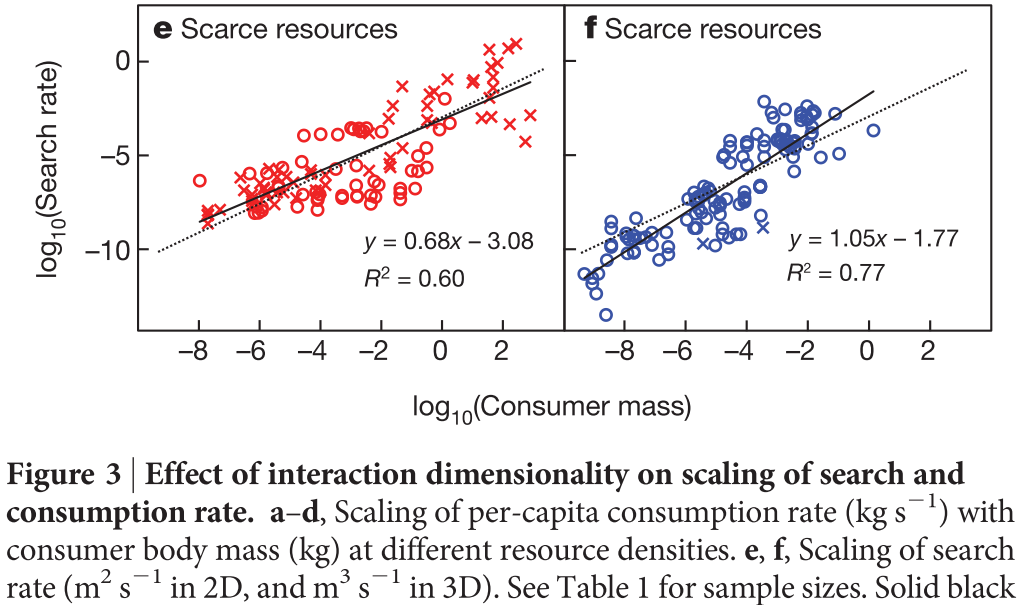

Handling Time Source (Pawar et al 2012 SI):
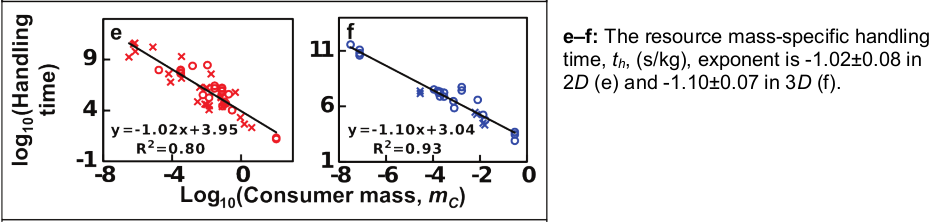


## Loss 
Metabolic loss ($L_B$) is described by the following equation:
\begin{align}
    B_m &= N_c(t)B_c \\
    B_m &\propto \frac{m(t)}{m_c} M^{-\frac{1}{4}}\\
    \text{If:   } m(t) = M , \\
    B_m &\propto \frac{MM^{-\frac{1}{4}}}{m_c} \propto \frac{M^\frac{3}{4}}{m_c}\\
    m(t) << M,\\
    B_m &\propto \frac{mM^{-\frac{1}{4}}}{m_c}\\
\end{align}

where:
- $B_m$ : Resting metabolic rate
- $N_c$ : Number of cells 
- $B_c$ : Metabolic cost of single cell
- $m(t)$ : Mass at time t
- $m_c$ : Mass of single cell
- $M$ : Assymptotic mass

# Functional Response
## No Resource Fluctuation
test the response behaviour by plotting for constant mass and linearly increasing resource density

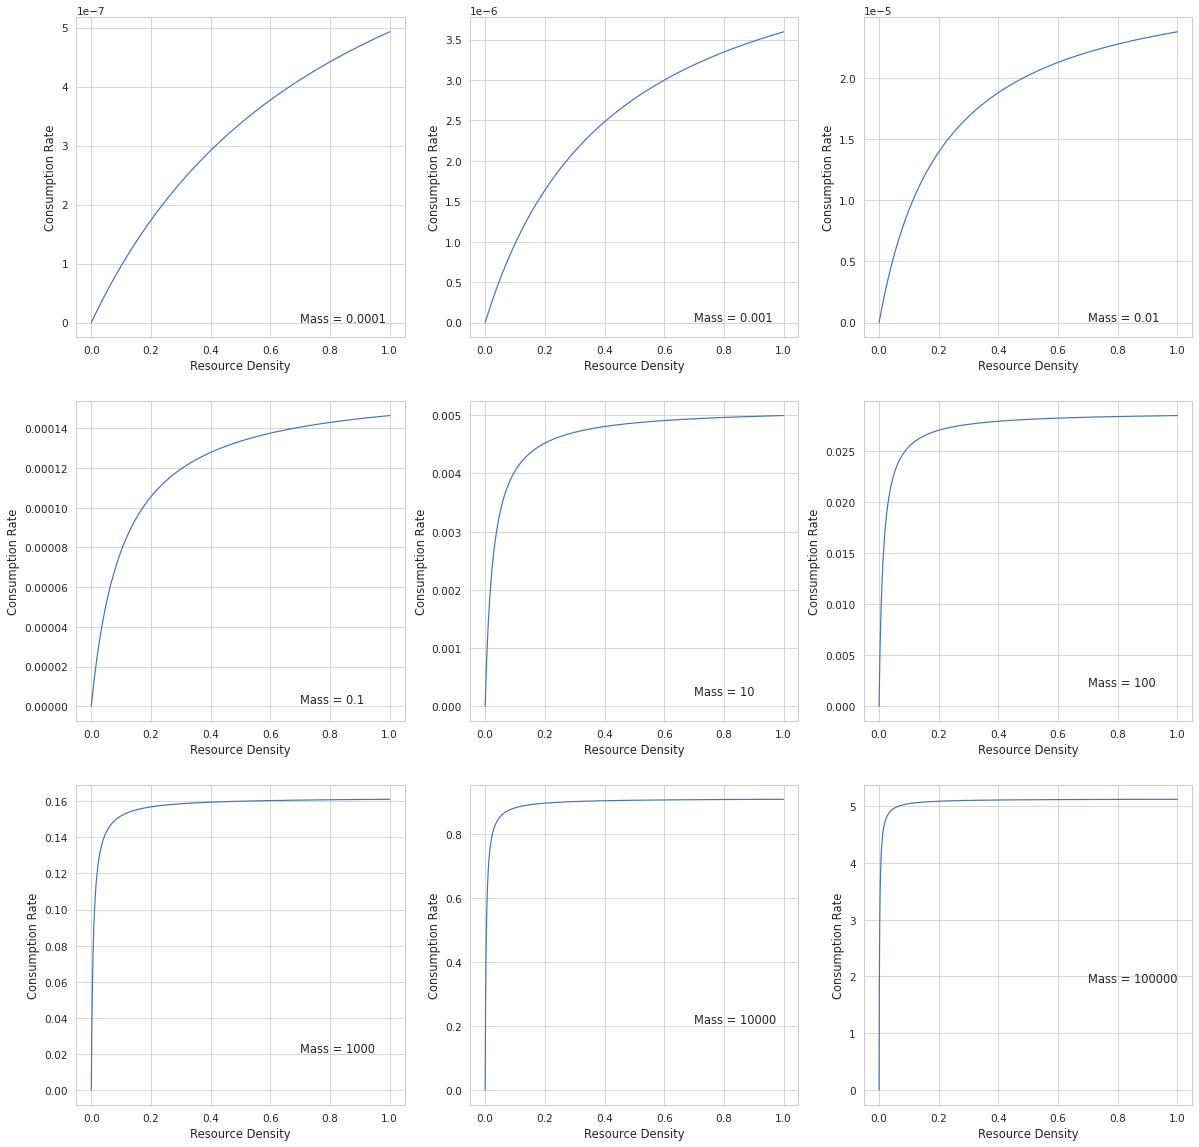

In [2]:
## parameters ##
resolution = 10**4 # resolution of the response
masses = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10**4, 10**5]
 

plt.figure(figsize=(20,20))

for i, m in enumerate(masses, 1):
    plt.subplot(3,3, i)
    ResDens = np.linspace(0, 1, resolution)
    FR = F.Fun_Resp(m, ResDens, "3D")   
    plt.plot(ResDens, FR)
    plt.xlabel("Resource Density")
    plt.ylabel("Consumption Rate")
    pos = int(resolution * 0.7)
    plt.text(ResDens[pos], FR[10], "Mass = " + str(m))
#     plt.ylim(top = 0.18)

plt.savefig("../results/FunctionalResponseCheck.pdf")
plt.show()


pattern is very similar but the consumption rate is very different.

consumption increases at a more rapid rate for higher masses as would be expected from the functional response where search rate increases with mass and handling time decreases

#### Search rate with increasing mass


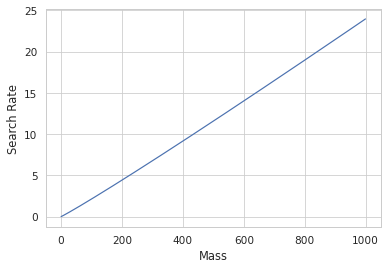

In [3]:
masses = np.arange(0.1, 10**3, 1)
searchRate = F.am(masses, dimensionality="3D")
plt.figure()
plt.plot(masses, searchRate)
plt.xlabel("Mass")
plt.ylabel("Search Rate")
plt.show()

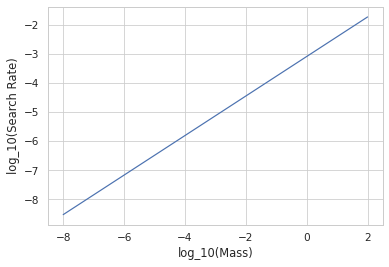

In [4]:
# checking based on Pawar et al 2012 figure 3e
masses = np.arange(10**-8, 10**2)
def search_test(m):
    a0 = -3.08 # this is log_10(a0) in reality, for 2D scarce resources
    gamma = 0.68 # abundant resources
    # gamma = 0.68 # scarce resources
    logged = (gamma*np.log10(m)) + a0
    return 10**logged # unlog data #abundant resources/

searchRate = search_test(masses)
plt.figure()
plt.plot(np.log10(masses), np.log10(searchRate))
plt.xlabel("log_10(Mass)")
plt.ylabel("log_10(Search Rate)")
plt.show()

Search Rate Source (Pawar et al 2012 Main text):
![./notebook_images/pawar2012_search_rate.png](./notebook_images/pawar2012_search_rate.png)


#### Handling Time with increasing mass

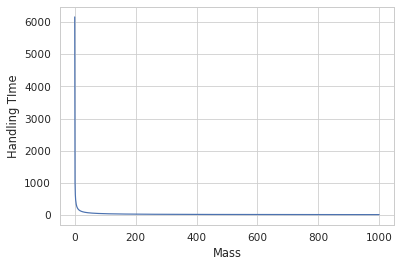

In [5]:
masses = np.arange(0.1, 10**3, 1)
HandlingTime = F.hm(masses, dimensionality="3D")
plt.figure()
plt.plot(masses, HandlingTime)
plt.xlabel("Mass")
plt.ylabel("Handling TIme")
plt.show()

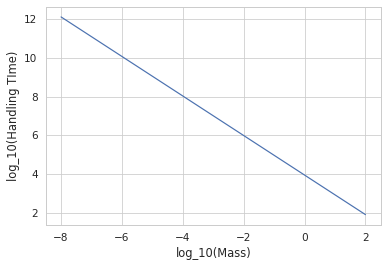

In [6]:
# checking based on Pawar et al 2012 SI figure 2e
def handling_test(m):
    tk0 = 3.95 # this is log_10(tk0) in reality
    beta = 1.02 # abundant resources
    # beta = -1.02 # scarce resoruces
    logged = (-beta*np.log10(m)) + tk0
    return 10**logged # unlog data #abundant resources/

masses = np.arange(10**-8, 10**2, 0.1)
HandlingTime = handling_test(masses)
plt.figure()
plt.plot(np.log10(masses), np.log10(HandlingTime))
plt.xlabel("log_10(Mass)")
plt.ylabel("log_10(Handling TIme)")
plt.show()

Handling Time Source (Pawar et al 2012 SI):

![./notebook_images/pawar2012_handling_time_fig.png](./notebook_images/pawar2012_handling_time_fig.png)

### Fluctuating Resources

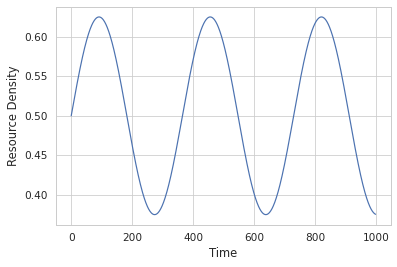

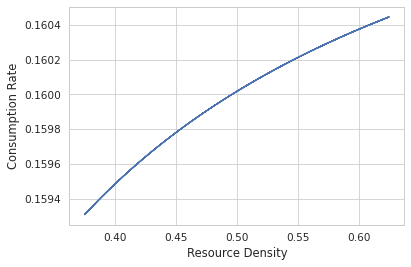

In [7]:
## parameters ##
m = 1000
average_resource_density = 0.5
t = np.arange(0, 10**3)
# fluctuates for 50% of the 
ResDens = F.Xrt(t=t, amp=average_resource_density*0.5, centre=average_resource_density, period =365)
FR = F.Fun_Resp(m, ResDens, "3D")    

plt.figure()
plt.plot(t, ResDens)
plt.xlabel("Time")
plt.ylabel("Resource Density")
plt.show()

plt.figure()
plt.plot(ResDens, FR)
plt.xlabel("Resource Density")
plt.ylabel("Consumption Rate")
plt.show()



# Parameters


In [8]:
# Parameters
norm_const = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 10, "epsilon" : 0.7, 
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0.1, "rho" : 0.75,
          "Xr" : 1, "amp" : 0.5, "period" : 365, "dimensionality" : "2D"}

### No fluctuation in R(t)

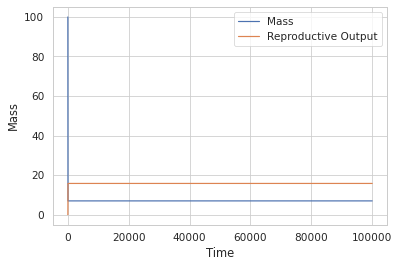

In [9]:
# plotting of growth curves of fish with no fluctuation

m0 = 100
R0 = 0
time = 10**5

result = F.plot_supply(m0, R0, time, params)
mass = result[:,0]
repro = result[:,1]




In [10]:
resources= 10
masses = [1,10,100, 1000]
# masses = np.arange(0.1, 10**4, 1000)
for m in masses:
    print("For mass = " + str(m))
    print("handling : " + str(F.hm(m, "3D"))) #  search rate 
    print("search : " + str(F.am(m, "3D"))) # handling time
    print("Func Response : " + str(0.6*F.Fun_Resp(m, resources, "3D")))
    print("Metabolic cost : " 
          + str(F.metabolic_cost(m)))
#     print("Metabolic cost : " + str(F.Bm(m)))
#     print("Metabolic cost : " + str(params["L_B"]*m))


For mass = 1
handling : 1096.4781961431852
search : 0.016982436524617443
Func Response : 0.0005442835280057492
Metabolic cost : 3.0240000000000005
For mass = 10
handling : 194.98445997580458
search : 0.19054607179632474
Func Response : 0.0030689082306353758
Metabolic cost : 17.04440271217687
For mass = 100
handling : 34.673685045253166
search : 2.1379620895022327
Func Response : 0.017280877756088067
Metabolic cost : 96.06867189644908
For mass = 1000
handling : 6.165950018614823
search : 23.98832919019491
Func Response : 0.09724286159833075
Metabolic cost : 541.479210260273


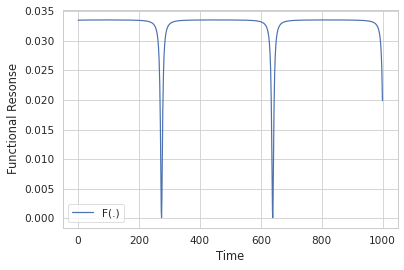

In [16]:
## checking F(.) with constant mass
import matplotlib.pyplot as plt

time = np.arange(0, 10**3,1) # 1000 days
m = 2000# growth curve 
  
# check the functional response over growth
FR = []
for t in time:
    FR.append(F.Fun_Resp(m, Xr = F.Xrt(t, amp=1, period=365, centre=100), dimensionality="2D"))
    
# FR = FR*mass
plt.figure()
plt.plot(time, FR, label="F(.)")
plt.xlabel("Time")
plt.ylabel("Functional Resonse")
plt.legend()
plt.show()



/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: divide by zero encountered in power
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:286: RuntimeWarning: invalid value encountered in multiply
  f = (a *Xr) / (1 + a*h*Xr)


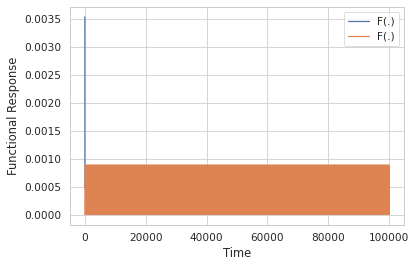

In [17]:
## checking F(.) with growth curve
import matplotlib.pyplot as plt

time = 10**5  
mass = F.dmdt_integrate(m0, R0, time, params)# growth curve 
  
# check the functional response over growth
FR = []
for t, m in enumerate(mass):
    FR.append(F.Fun_Resp(m, Xr = F.Xrt(t, amp=1, period=365, centre=100), dimensionality="2D"))
    
# FR = FR*mass
plt.figure()
plt.plot(np.arange(0, time, 1), FR, label="F(.)")
plt.xlabel("Time")
plt.ylabel("Functional Response")
plt.legend()
plt.show()
# print(FR)

playing with the fluctuation of R seems to only affect the growth phase

the affect also seems to be fairly minimal for even as much a 50% fluctuation

### Adding Fluctuation for R(t)
#### Different periods and amplitudes

In [20]:
## looking at how the response varies for fixed size and amplitude
masses = [0.1, 1, 10, 100, 1000]# masses in g
time = np.arange(0, 10**3,1)
centre = 10 #  value to fluctuate around
amps = np.linspace(0, centre, len(masses))
# plt.figure()

# for i, m in enumerate(masses,1):
#     FR = []
#     for j, amp in enumerate(amps):
#         for t in time:
#             FR.append(F.Fun_Resp(m, F.Xrt(t, amp, centre, period = 365)))
#         plt.subplot(5,5, i+j)
#         plt.plot(t, FR)
# FR = []
# Xrt = []
# for t in time:
#     Xrt.append(F.Xrt(t, amps,centre, period = 365))
#     FR.append(F.Fun_Resp(masses, Xrt[t]))
    
# plt.plot(Xrt,FR)

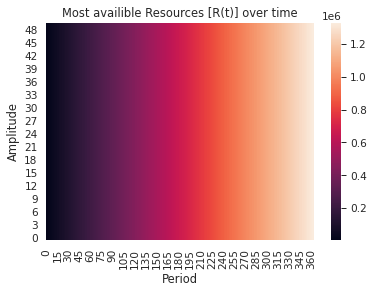

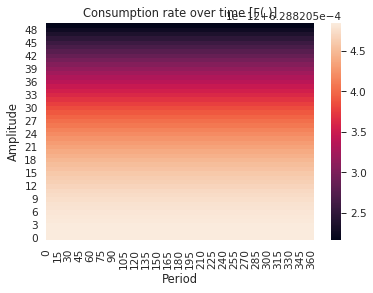

In [21]:
# heatmap of how 
import Functions as F
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.integrate import odeint as odeint
resource = 0.001
days = 365
period = np.arange(1, days, 1)
amp = np.linspace(0, resource, 50) # use linspace here since i dont know what the resource value looks like yet
time = np.arange(0, days*10, 1)
period, amp = np.meshgrid(period, amp)

## Resource density
R_t = np.zeros_like(amp)

for t in time:
    R_t = R_t + F.Xrt(t, amp, period, resource)
    
# # plt.xlabel("")
# # sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()
sb.heatmap(R_t).invert_yaxis()
plt.title("Most availible Resources [R(t)] over time")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()

## functional response
FuncResp = np.zeros_like(amp)

for t in time:
    FuncResp = F.Fun_Resp(m = 0.1,  Xr = F.Xrt(t, amp, centre = resource), dimensionality="2D") + FuncResp
    
sb.heatmap(FuncResp).invert_yaxis()
plt.title("Consumption rate over time [F(.)]")
plt.xlabel("Period")
plt.ylabel("Amplitude")
plt.show()

## properly using integration 
# def FuncInt(m, t, amp, period, centre, h):
#     return F.Fun_Resp(m, F.Xrt(t, amp, period, centre = resource), h)
# t = np.arange(0, 365*2, 1)
# m = 0.1
# h = 2.57
# centre = resource

# FuncRespInt = odeint(FuncInt, m, t, args=(amp, period, centre, h))


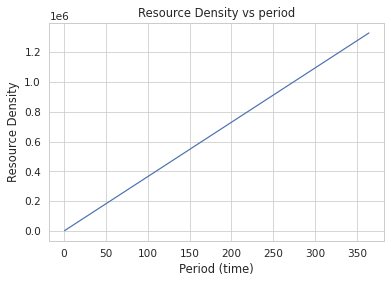

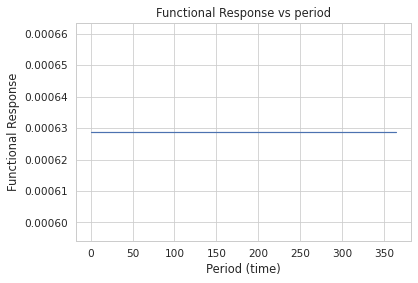

In [22]:
# looking at the resource fluctuation with period
plt.figure()
plt.plot(period[0,:], R_t[-1,:], label = "F(.)")
plt.title("Resource Density vs period")
plt.xlabel("Period (time)")
plt.ylabel("Resource Density")
plt.show()
# looking at the fucntional response fluctuation with period
plt.figure()
plt.plot(period[0,:], FuncResp[-1,:], label = "F(.)")
plt.title("Functional Response vs period")
plt.xlabel("Period (time)")
plt.ylabel("Functional Response")
plt.show()

#### Constant Period

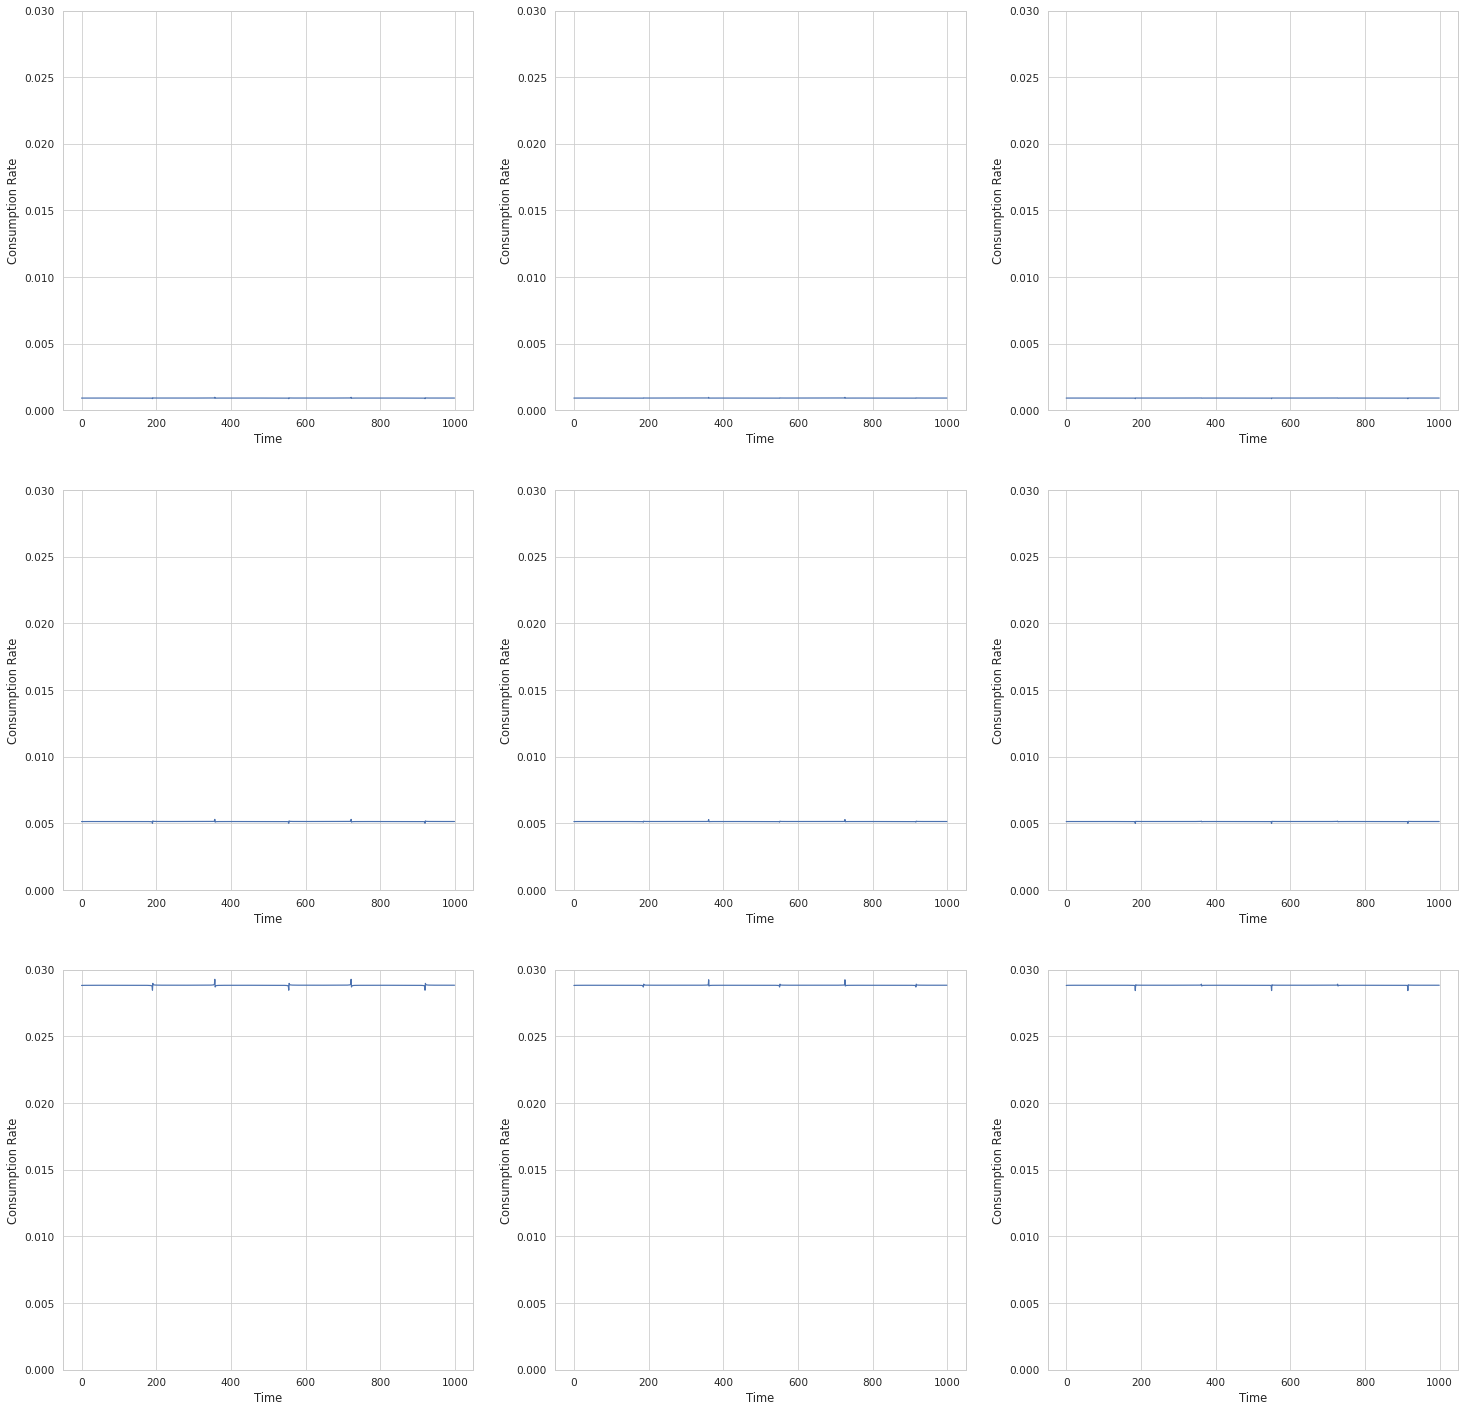

In [23]:
time = np.arange(0, 10**3, 1)
resource = 10*3
period = 365
masses = [1, 10, 100]
amps = [i*resource for i in [0.25, 0.5, 0.75]]

plt.figure(figsize=(25, 25))
ticker = 0
for m in masses:
    for amp in amps:
        ticker = ticker +1
        FR = [0] * len(time)
        
        for t in time:
            R_t = F.Xrt(t, amp, resource, period)
            FR[t] = F.Fun_Resp(m, R_t, "3D") 

        plt.subplot(3,3, ticker)
#         plt.title(str(amp) +","+ str(FR))
        plt.plot(time, FR, label = str(amp) +","+ str(m))
#         plt.text(20, min(FR) - max(FR) + 0.001,"amp = " + str(amp) +","+ "mass =" + str(m))
        plt.xlabel("Time")
        plt.ylabel("Consumption Rate")
        plt.ylim(top = 0.03, bottom = 0.000)

plt.savefig("../results/AmplitudeConsumption9x9.pdf")
plt.show()

            

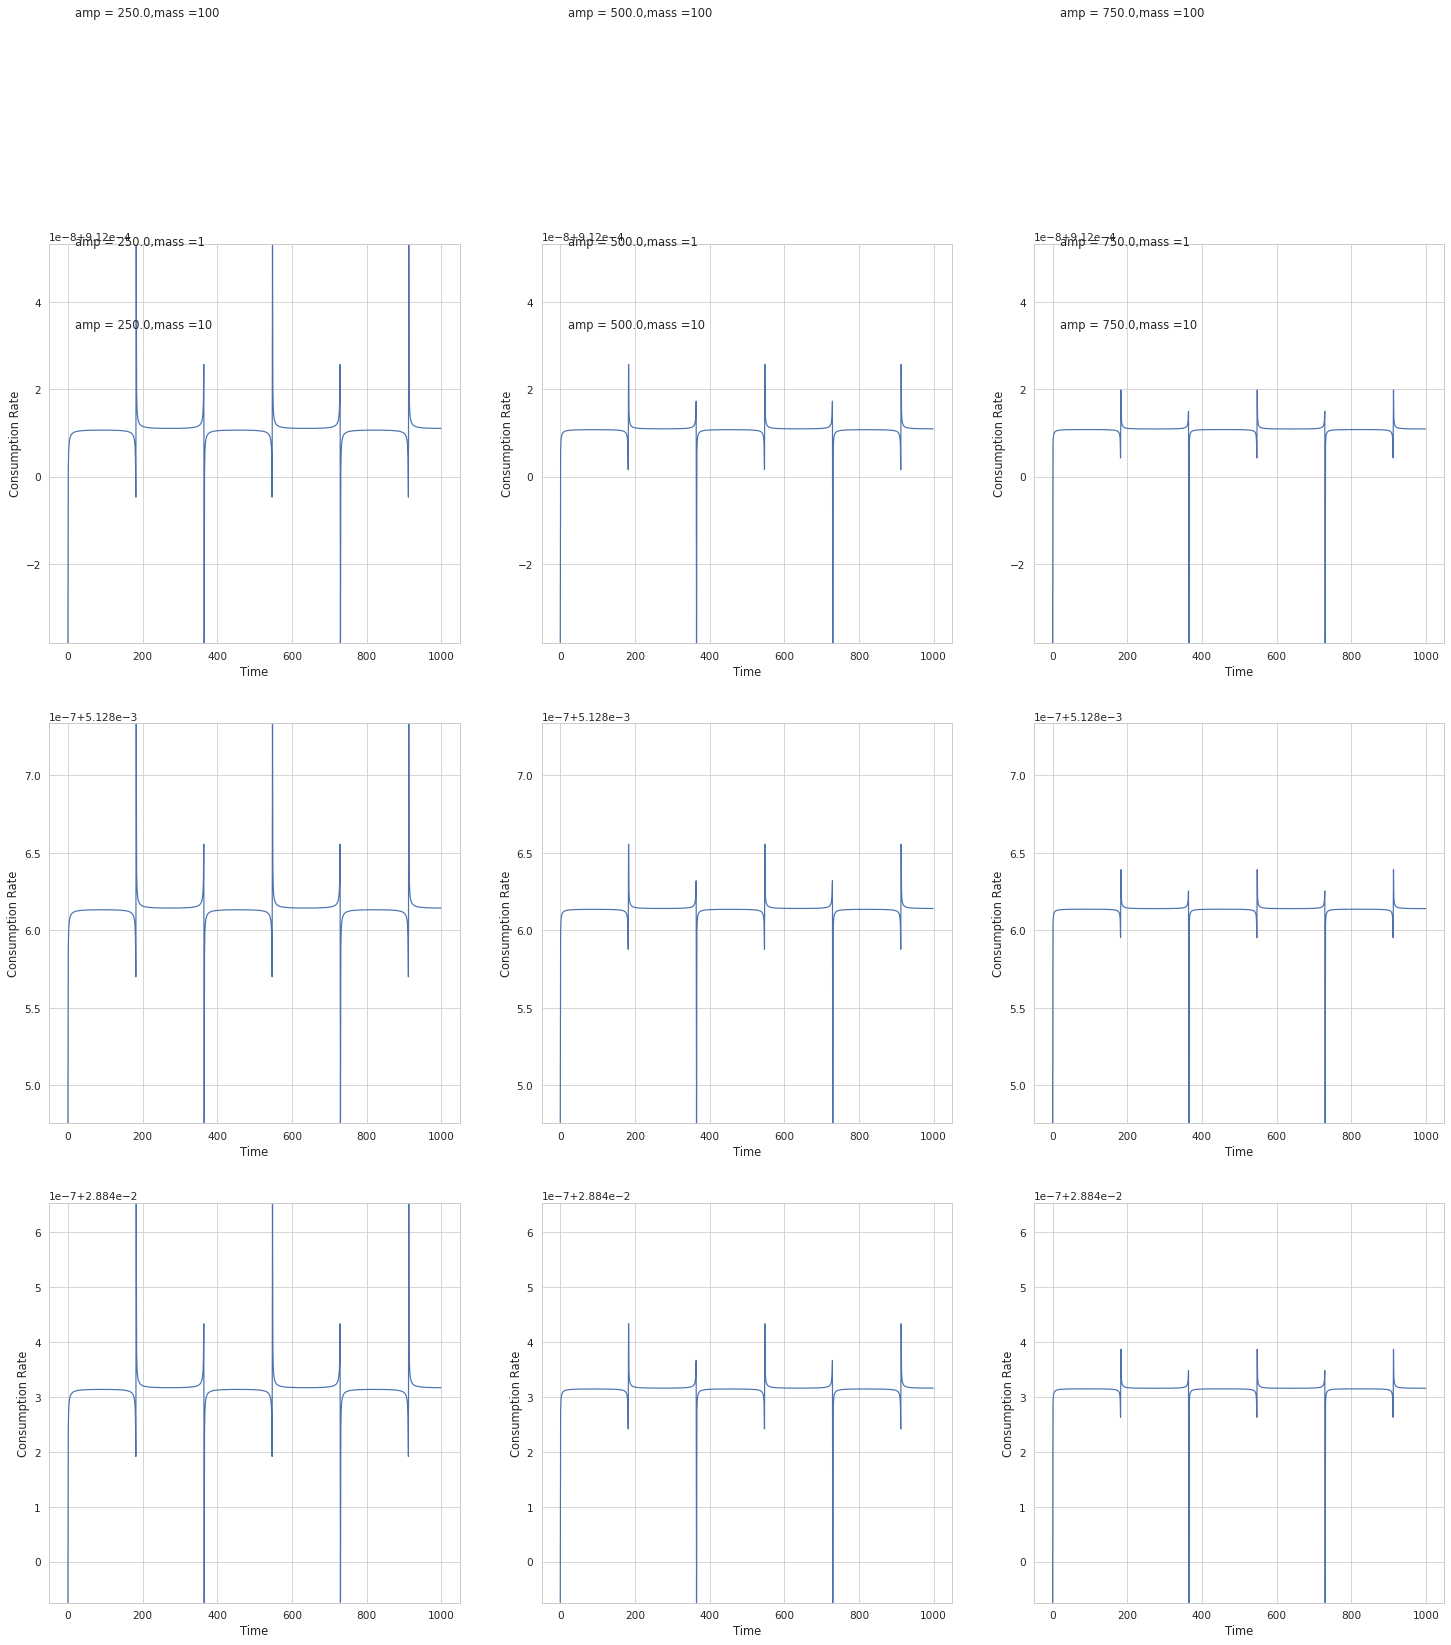

In [24]:
## same as above plot
# but with scales adjusted to be same within mass
time = np.arange(0, 10**3, 1)
resource = 10**3
period = 365
masses = [1, 10, 100]
amps = [i*resource for i in [0.25, 0.5, 0.75]]

plt.figure(figsize=(25, 25))
ticker = 0
for m in masses:
    for i, amp in enumerate(amps,1):
        ticker = ticker +1
        FR = [0] * len(time)
        
        for t in time:
            R_t = F.Xrt(t, amp, resource, period)
            FR[t] = F.Fun_Resp(m, R_t, "3D") 
            
        # to get y axis limits
        if i == 1:
            ytop = max(FR) 
            ybot = min(FR) 
            text_pos = ybot + (ybot* 0.0001)
        # plot
        plt.subplot(3,3, ticker)
        plt.plot(time, FR, label = str(amp) +","+ str(m))
        plt.text(20, text_pos,"amp = " + str(amp) +","+ "mass =" + str(m))
        plt.xlabel("Time")
        plt.ylabel("Consumption Rate")
        plt.ylim(top = ytop , bottom = ybot)

plt.savefig("../results/AmplitudeConsumption9x9_byAmp.pdf")
plt.show()

            

### Considerations about fluctuation
Fluctuation appears to mainly affect the start of the growth curve and not so much once stability is reached.
So this raises the questions:
- where on the sin wave does the organism start
- 

# Metabolic Cost
### Unit Conversion Table
Table pulled from [Fundamentals of Ecosystem Science by Kathleen C. Weathers, David L. Strayer, Gene E. Likens](https://books.google.ie/books?id=1O9F9ctCCR4C&pg=PA26&lpg=PA26&dq=convert+grams+carbon+to+wetmass&source=bl&ots=289NqLQcfg&sig=ACfU3U3Bt8TLSZbQB3cXBUTnDETm5O0wYg&hl=en&sa=X&ved=2ahUKEwiHl9mzsMDqAhUUrHEKHc2bAqEQ6AEwAXoECAgQAQ#v=onepage&q=convert%20grams%20carbon%20to%20wetmass&f=false):
![UnitTable](./notebook_images/Unit_Conversion_Table__Fundamentals_of_Ecosystem_Science.png)
### As proportion on Effective Intake rate
Effective intake rate can be considered to be proportional to consumtpion rate
- so will take $L_B$ to be some proportion of search rate e.g. 10%
consumption under limiting resources can be taken to be search rate $\times$ resouce density:
$$
\text{search rate} = a_0 m^\gamma \\
\text{consumption} =  a_0 m^\gamma R(t)
$$
maintenance is then taken to be:
$$
B_m = B_0 m^\beta
$$
$B_0$ is taken to be some proportion ($z$) of consumption
$$
B_0 = z a_0 R(t)
$$

#### Plots vs effective consumption

In [25]:
# effective consumption rate
def consumption(mass, resource, gamma=0.75):
    """
    For calculating effective consumption of an individual for a given mass and resource density.
    
    Args:
        mass (float): Mass of the individual
        resource (float): Resource density
        gamma (float): scaling exponent of consumption
    """
    a0 = 10**-1.77 # from pawar et al 2012
    constant = a0 *resource
    return constant * (mass**gamma)


In [26]:
consumption(1, 10**-2)

0.00016982436524617443

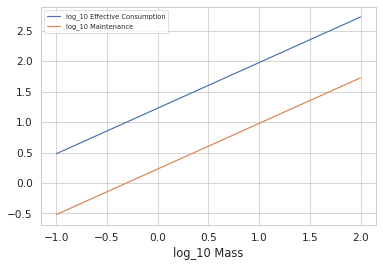

In [27]:
mass = np.linspace(0.1, 100, 100)
resources = 10**-5
proportion = 0.1# proportion of effective intake that is maintenance

plt.figure()
consume = consumption(mass, resource)
log_consume = np.log10(consume)
maintenance = proportion * consume
log_mainenance = np.log10(maintenance)
log_mass = np.log10(mass)
plt.plot(log_mass, log_consume, label="log_10 Effective Consumption")
plt.plot(log_mass, log_mainenance, label="log_10 Maintenance")
plt.xlabel("log_10 Mass")
# plt.savefig("../results/Effective_Consumption.pdf")
plt.legend(fontsize='xx-small')
plt.show()


#### Plot with empirical estimate

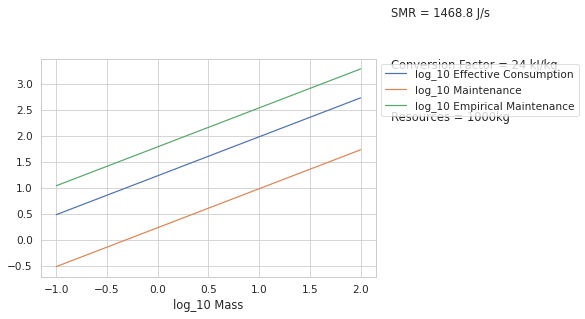

In [28]:
SMR = 17 # in kJ/d
SMR = SMR /1000 # /1000 kJ -> J # 
SMR = SMR *24*60*60 # days -> hours -> minutes -> seconds
conversion_fact = 24 # J/kg # in kg for comaprison with samraats handling time
Bm = SMR / conversion_fact # J/s / J/kg = kg/s
empirical = Bm * mass**0.75

plt.figure()
plt.plot(log_mass, log_consume, label="log_10 Effective Consumption")
plt.plot(log_mass, log_mainenance, label="log_10 Maintenance")
plt.plot(log_mass, np.log10(empirical), label="log_10 Empirical Maintenance")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical)), 
         "Conversion Factor = " + str(conversion_fact) + " kJ/kg")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical))+1, 
         "SMR = " + str(SMR) + " J/s")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical))-1, 
         "Resources = " + str(resource) + "kg")
plt.legend(fontsize='xx-small')
plt.xlabel("log_10 Mass")
plt.savefig("../results/Effective_Consumption.pdf")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Including functional response
__Note__ that the functional response is $\equiv$ search rate and handling time$^-1$ for low and high resources respectively.  Therefore the response line overlaps with these depending on resources.

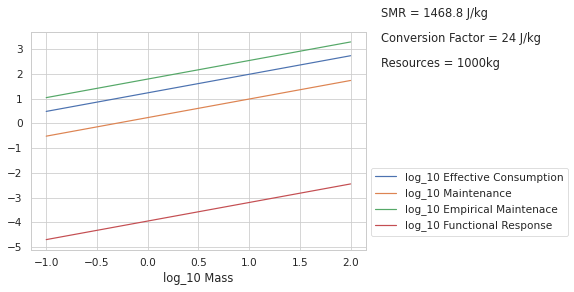

In [31]:
func_resp = F.Fun_Resp(mass, resource, dimensionality="2D")

plt.figure()
plt.plot(log_mass, log_consume, label="log_10 Effective Consumption")
plt.plot(log_mass, log_mainenance, label="log_10 Maintenance")
plt.plot(log_mass, np.log10(empirical), label="log_10 Empirical Maintenace")
plt.plot(log_mass, np.log10(func_resp), label="log_10 Functional Response")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical)), 
         "Conversion Factor = " + str(conversion_fact) + " J/kg")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical))+1, 
         "SMR = " + str(SMR) + " J/kg")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical))-1, 
         "Resources = " + str(resource) + "kg")
plt.xlabel("log_10 Mass")
plt.savefig("../results/Effective_Consumption_with_response.pdf")
plt.legend(bbox_to_anchor=(1, 0.4))
plt.show()

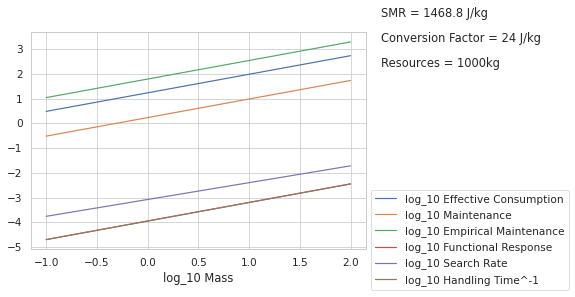

In [34]:
plt.figure()
plt.plot(log_mass, log_consume, label="log_10 Effective Consumption")
plt.plot(log_mass, log_mainenance, label="log_10 Maintenance")
plt.plot(log_mass, np.log10(empirical), label="log_10 Empirical Maintenance")
plt.plot(log_mass, np.log10(func_resp), label="log_10 Functional Response")
plt.plot(log_mass, np.log10(F.am(mass, dimensionality="2D")), label="log_10 Search Rate")
plt.plot(log_mass, np.log10(1/F.hm(mass, dimensionality="2D")), label="log_10 Handling Time^-1")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical)), 
         "Conversion Factor = " + str(conversion_fact) + " J/kg")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical))+1, 
         "SMR = " + str(SMR) + " J/kg")
plt.text(max(log_mass) + 0.3, max(np.log10(empirical))-1, 
         "Resources = " + str(resource) + "kg")
plt.legend(fontsize='xx-small')
plt.xlabel("log_10 Mass")
plt.savefig("../results/Effective_Consumption_with_parameters.pdf")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

array([    0.       ,     0.       ,     0.       , ..., 15995.9570144,
       15995.9570144, 15995.9570144])

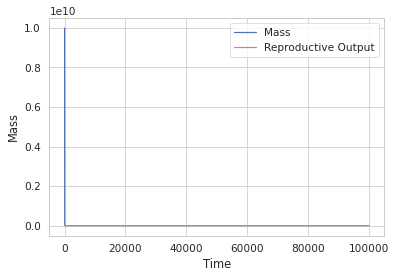

In [35]:
# params = {"alpha" : 200, "epsilon" : 0.8,
#           "metabolic_rate" : 2.2, "conversion_factor" : 7*10**9, 
#           "c" : 0.1, "rho" : 0.75,
#           "Xr" : 10**10, "amp" : 0, "period" : 365, "dimensionality" : "3D"}

m0 = 10**10
R0 = 0
time = 10**5


res = F.plot_supply(m0, R0, time, params)
res[:, 1]

In [36]:
params

{'alpha': 10,
 'epsilon': 0.7,
 'norm_const': 9.694238137452219,
 'meta_prop': 0.1,
 'meta_exp': 1,
 'c': 0.1,
 'rho': 0.75,
 'Xr': 1,
 'amp': 0.5,
 'period': 365,
 'dimensionality': '2D'}

In [37]:
# res[:175, 0]

### Estimating Metabolic rate from data
- Data taken from "Metabolic depression in fish measured by direct calorimetry: A review" - Van Ginneken et al 2009 section 2 

SMR = standard metabolic rate

SMR of poikilotherms = $17kJ kg^{0.75} \cdot day^{−1}$

#### Conversion Factor
From Rizzuto et al 2018: 
- energy content of wet mass $1kg = 7 \times 10^6 J$
    - $1g = 7 \times 10^9 J = 7 \times 10^6 kJ$
        - $= 7 \times 10^6 kJ \cdot g^{-1} = 7 \times 10^9 kJ \cdot kg^{-1}$
        
From Barneche et al 2018 and hou et al 2008
- energy content of wet mass $\approx 24 kJ \cdot g^{-1} = 24 \times 10^{-3} kJ \cdot kg^{-1}$

#### Dimensional Analysis
SMR in mass / time:

\begin{align}
    \text{($SMR$) SMR of poikilotherms } &= kJ \cdot kg^{0.75} \cdot day^{−1}\\
    \text{($C_f$) Conversion Factor} &= kJ \cdot kg^{-1}\\
    \text{($m(t)$) Mass of an organism at time t} &= kg\\
    \text{($E_i$) Energy in organism's biomass} &= C_f \times m \\
                                            &= kJ \cdot kg^{-1} \times kg \\
                                            &= kJ\\
    \\
    \text{"Mass cost"} &= \frac{SMR}{E_i}\\
                        &= \frac{kJ \cdot kg^{0.75} \cdot d^{-1}}  {kJ}\\
                        &= kg^{0.75} \cdot d^{-1}\\
                        \\
\end{align}

above is wrong from a theory standpoint since cost will shrink as mass increases

\begin{align}
\\
    \text{($SMR$) SMR of poikilotherms } &= kJ \cdot kg^{0.75} \cdot day^{−1}\\
    \text{($C_f$) Conversion Factor} &= kJ \cdot kg^{-1}\\
    \text{($m(t)$) Mass of an organism at time t} &= kg\\
    \\
    \text{"Mass cost"} &= \frac{SMR}{C_f} \times m(t)\\
                        &= \frac{kJ \cdot kg^{0.75} \cdot d^{-1}}  {kJ \cdot kg^{-1}} \times kg\\
                        &= kg^{1.75} \cdot d^{-1} \times kg\\
\end{align}


## [Barneche et al 2014](https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1111%2Fele.12309&file=ele12309-sup-0001-Supinfo.pdf)
Looks at the metabolic cost in fish provides data on both routine metabolic rate and standard metabolic rate.

- routine metabolic rate ([Figure S4](https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1111%2Fele.12309&file=ele12309-sup-0001-Supinfo.pdf))
    : $ln(\text{routine metabolic rate @ 20C }(g \cdot C \cdot d^{-1}) = 0.76 ln(Mass(g))-5.84$

![routine metabolic rate](./notebook_images/Barneche2014S4.png)

- standard metabolic rate ([Figure S5](https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1111%2Fele.12309&file=ele12309-sup-0001-Supinfo.pdf))
    : $ln(\text{standard metabolic rate @ 20C }(g \cdot C \cdot d^{-1}) = 0.82 ln(Mass(g))-6.20$
    
![standard metabolic rate](./notebook_images/Barneche2014S5.png)



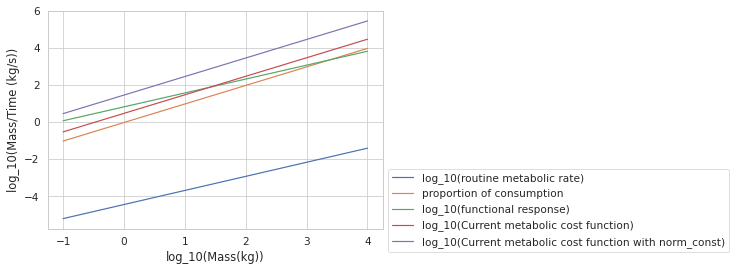

In [38]:
def barneche2014(m):
    """
    routine metabolic rate from barneche et al 2014.
    outputs in g C /d
    """
    # routine rate
    alpha = 0.76
    intercept = np.exp(-5.71)
    return intercept * (m**alpha)

mass = np.linspace(0.1, 10**4, 100)
resource = 10**4
barneche = barneche2014(mass) # g C /d
##convert to SI units
barneche = barneche /1000 #g -> kg
# barneche =barneche /(24*60*60) # day -> hours -> minutes -> seconds
barneche =barneche *11 # C -> wetmass #  conversion from `unit conversion table` section

# 

# functional response
fun_resp = F.Fun_Resp(mass, resource, dimensionality="2D") #kg/s
fun_resp = fun_resp *60*60*24 #kg/d
log_bm = log10(params["norm_const"]*params["meta_prop"]*mass**params["meta_exp"])

# logging data
log_mass = np.log10(mass)
log_barneche = np.log10(barneche)
log_fun_resp = np.log10(fun_resp*0.7)
log_meta_cost = np.log10(F.metabolic_cost(mass, meta_exp=1)) #not times norm_const
log_meta_norm = np.log10(F.metabolic_cost(mass, meta_exp=1)*norm_const)


plt.figure()
plt.plot(log_mass, log_barneche, label="log_10(routine metabolic rate)")
plt.plot(log_mass, log_bm, label="proportion of consumption")
plt.plot(log_mass, log_fun_resp, label="log_10(functional response)")
plt.plot(log_mass, log_meta_cost, label="log_10(Current metabolic cost function)")
plt.plot(log_mass, log_meta_norm, label="log_10(Current metabolic cost function with norm_const)")
plt.xlabel("log_10(Mass(kg))")
plt.ylabel("log_10(Mass/Time (kg/s))")
plt.legend(fontsize="xx-small", loc="lower right")
plt.savefig("../results/Barneche_Metabolic_rate_vs_Functional_Response.pdf")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

### Parameters

In [39]:
# params = {"alpha" : 200, "epsilon" : 0.8,
#           "metabolic_rate" : 2.2, "conversion_factor" : 7*10**9, 
#           "c" : 0.1, "rho" : 0.75,
#           "Xr" : 10**10, "amp" : 0, "period" : 365, "dimensionality" : "3D"}

### Plotting Cost with Mass

Text(0, 0.5, 'Cost')

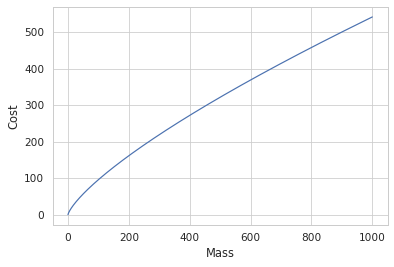

In [40]:
# plotting metabolic cost function with increasing mass

mass = np.linspace(0.1 , 1000, 1000)
time = np.arange(0, 1000, 1)

cost = F.metabolic_cost(mass)

plt.figure()
plt.plot(mass, cost)
plt.xlabel("Mass")
plt.ylabel("Cost")

In [41]:
cost[:10]

array([ 0.5365149 ,  3.25038425,  5.28260574,  7.07747999,  8.73110084,
       10.28619928, 11.76666479, 13.18761844, 14.55942129, 15.88957743])

## Varying Metabolic Cost
Possibly due to the matabolic cost being too low, the growth is very rapid with 100kg+ idividuals being simulated at <100 days.  To investigate the factors affecting this I will look at incrementally increasing metabolic costs as a proportion of consumption i.e. the consumption. Looking at both the cost constant and exponent

In [42]:
# Parameters
norm_const = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 10, "epsilon" : 0.7, 
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 0.9,
          "c" : 1, "rho" : 0.2,
          "Xr" : 10**10, "amp" : 0, "period" : 365, "dimensionality" : "2D"}

m0 = 0.1
R0 = 0
time = 100

No handles with labels found to put in legend.


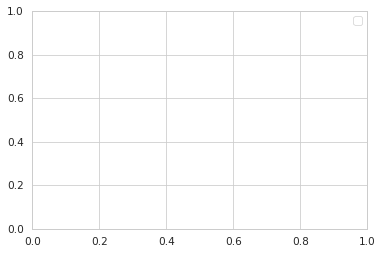

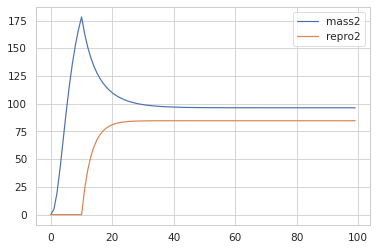

In [43]:
proportions = around(arange(0.1, 1, 0.01), 2)
plt.figure()
t = arange(0, time, 1)
for i in proportions:
    params["meta_prop"] = i
    result = F.dmdt_integrate(m0, R0, time, params)
    mass = result[:, 0]
    repro = result[:,1]
    if isnan(mass[-1])  or mass[-1] < m0 or mass[params["alpha"]] > mass[-1] or mass[-1] > 10**3 :
        continue

    plt.plot(t, mass, label=str(i))
#     plt.plot(t, repro, label="repro" + str(i))
plt.legend(bbox_to_anchor = (1,1))
plt.show()
plt.figure()
params["meta_prop"] = 0.3
result = F.dmdt_integrate(m0, R0, time, params)
mass = result[:, 0]
repro = result[:,1]
plt.plot(t, mass, label="mass2")
plt.plot(t, repro, label="repro2")
plt.legend(loc="upper left")
plt.savefig("../results/meta_prop.pdf")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

array([[1.00000000e-01, 0.00000000e+00],
       [4.84146748e+00, 0.00000000e+00],
       [1.95048729e+01, 0.00000000e+00],
       [4.17239482e+01, 0.00000000e+00],
       [6.71946162e+01, 0.00000000e+00],
       [9.25476446e+01, 0.00000000e+00],
       [1.15792334e+02, 0.00000000e+00],
       [1.36023515e+02, 0.00000000e+00],
       [1.53029993e+02, 0.00000000e+00],
       [1.66984982e+02, 0.00000000e+00],
       [1.78240957e+02, 5.01655254e-10],
       [1.62966899e+02, 2.32995886e+01],
       [1.51003402e+02, 4.01069365e+01],
       [1.41511371e+02, 5.22610714e+01],
       [1.33895323e+02, 6.10687153e+01],
       [1.27724761e+02, 6.74626424e+01],
       [1.22683057e+02, 7.21113327e+01],
       [1.18533594e+02, 7.54954811e+01],
       [1.15096932e+02, 7.79617502e+01],
       [1.12235143e+02, 7.97607586e+01],
       [1.09840890e+02, 8.10740706e+01],
       [1.07829696e+02, 8.20334583e+01],
       [1.06134394e+02, 8.27347021e+01],
       [1.04701083e+02, 8.32475122e+01],
       [1.034861

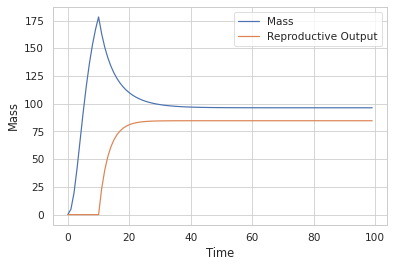

In [44]:
params["meta_prop"] = 1
F.plot_supply(m0, R0, time, params)

## Reproductive Cost

# Abundant Resource Growth
This is a simulation with functionally unlimited resources since intake will be limited by handling time.

## Parameters

In [45]:
# Parameters
norm_const = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 100, "epsilon" : 0.8, 
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0.1, "rho" : 0.4,
          "Xr" : 10**10, "amp" : 0, "period" : 365, "dimensionality" : "2D"}
params["Xr"] = 10**10
m0 = 0.1
R0 = 0
time = 10**3

## Simulation

highest mass = 43.26012507202855


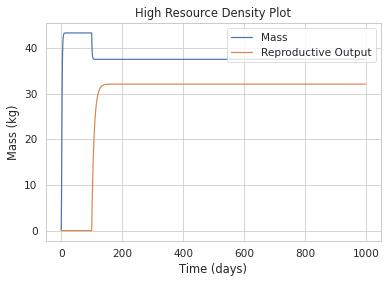

In [46]:
curve = F.dmdt_integrate(m0, R0, time, params)
mass = curve[:,0]
repro = curve[:,1]
t = arange(0, time, 1)
plt.figure()
plt.plot(t, mass, label="Mass")
plt.plot(t, repro, label="Reproductive Output")
plt.legend(loc= "upper right")
plt.title("High Resource Density Plot")
# plt.text(params["alpha"]+0.3*time, 100, "Resource Density = " + str(params["Xr"])+ "kg")
plt.xlabel("Time (days)")
plt.ylabel("Mass (kg)")
print("highest mass =", max(curve[:,0]))

# Scarce Resource Growth
A simulation for the lowest possible resource density which yields a meaningful growth curve.

## Parameters (Initial)

In [55]:
# Parameters
norm_const = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 100, "epsilon" : 0.7, 
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0.1, "rho" : 0.1,
          "Xr" : 10**10, "amp" : 0, "period" : 365, "dimensionality" : "2D"}

m0 = 10**-4
R0 = 0
time = 10**3

## Finding Minimum Viable Resouces 

/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))


Min Resources is:  0.15


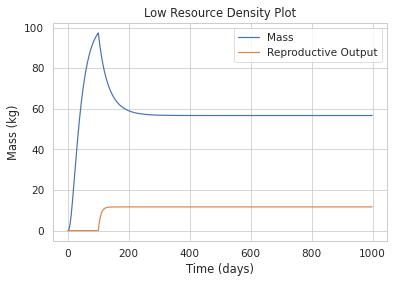

In [65]:
resource_vec = arange(0, 10**2, 0.01)
alpha = params["alpha"]
for Xr in resource_vec:
    # assign resource density and simulate
    params["Xr"] = Xr
    result = F.dmdt_integrate(m0, R0, time, params)
    mass = result[:,0]
    # check for viable curve
#     if mass[params["alpha"]] >= mass[0] and mass[alpha] <= mass[-1]and not isnan(mass[-1]):# and mass[-1] >= mass[params["alpha"]]:
    if mass[params["alpha"]] >= mass[0] and not isnan(mass[-1]):   
        min_viable = Xr
        viable_curve = F.dmdt_integrate(m0, R0, time, params)
        mass = viable_curve[:,0]
        repro = viable_curve[:,1]
        t = arange(0, time, 1)
        plt.figure()
        plt.plot(t, mass, label="Mass")
        plt.plot(t, repro, label="Reproductive Output")
        plt.legend(loc= "upper right")
        plt.title("Low Resource Density Plot")
#         plt.text(params["alpha"]+0.3*time, 25, "Resource Density = " + str(params["Xr"]) + "kg")
        plt.xlabel("Time (days)")
        plt.ylabel("Mass (kg)")
        break

print("Min Resources is: ", min_viable)


In [66]:
params

{'alpha': 100,
 'epsilon': 0.7,
 'norm_const': 9.694238137452219,
 'meta_prop': 0.1,
 'meta_exp': 0.75,
 'c': 0.1,
 'rho': 0.1,
 'Xr': 0.15,
 'amp': 0,
 'period': 365,
 'dimensionality': '2D'}

In [49]:
break

SyntaxError: 'break' outside loop (<ipython-input-49-6aaf1f276005>, line 1)

# Fluctuating Resource Growth
Important parameter here is `Xr` which determines what value resource density will fluctuate around.  Additionally, `amp` determines by how much resources will fluctuate, where $1=100\%$ fluctuation. The period of the cycle is set to 365 to represent one full year.

`amp` and `Xr` interact to determine how long the cycle is at the upper limit of the functional response, i.e. becoming limited by handling time, and how long it is at the lower limit, i.e. determined by search rate.

### Notes
- 14/07 - growth is too fast for the fluctuation to make much of a difference at the moment. The curve just ressemble what it would look like at the `centre` value

## Parameters

In [ ]:
# Parameters
norm_const = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 100, "epsilon" : 0.8, 
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0.1, "rho" : 0.4,
          "Xr" : 0.2, "amp" : 0.99, "period" : 365, "dimensionality" : "2D"}

m0 = 0.1
R0 = 0
time = 10**3
t = arange(0, time, 1)

In [ ]:
## test flucuation
resources = F.Xrt(t, 0.99, 1, params["period"])
plt.figure()
plt.plot(t, resources, label="resources")
# plt.plot(t, F.Fun_Resp(1, resources, dimensionality="2D"), 
#          label="functional response")
plt.xlabel("Time (days)")
plt.ylabel("Resource Density (kg)")
print("Max resources value: ", max(resources))
print("Min resources value: ", min(resources))

In [ ]:
## plot the result
curve = F.dmdt_integrate(m0, R0, time, params)
mass = curve[:,0]
repro = curve[:,1]
t = arange(0, time, 1)
plt.figure()
plt.plot(t, mass, label="Mass")
plt.plot(t, repro, label="Reproductive Output")
plt.legend(loc= "upper right")
plt.title("High Resource Density Plot")
# plt.text(params["alpha"]+0.3*time, 100, "Mean Resource Density = " + str(params["Xr"])+ "kg")
plt.xlabel("Time (days)")
plt.ylabel("Mass (kg)")
print("highest mass =", max(curve[:,0]))

# Optimise

## Parameters

In [ ]:

# params = {"alpha" : 200, "epsilon" : 0.8,
#           "metabolic_rate" : 17, "conversion_factor" : 9*10**9, 
#           "c" : 0.1, "rho" : 0.75,
#           "Xr" : 10**10, "amp" : 0, "period" : 365, "dimensionality" : "3D"}
m0 = 0.1
R0 = 0
time = 10**5
resolution = 0.1
c_vec = np.arange(0, 2, resolution)
rho_vec = np.arange(0, 2, resolution)

result = F.find_optimum(c_vec, rho_vec, m0, R0, time, params)

In [ ]:
result

## Results

In [ ]:
# will error here if not only one value is found.
c_opt = result[0]
rho_opt = result[1]
params["c"] = c_opt
params["rho"] = rho_opt

F.plot_supply(m0, R0, time, params)
print("rho = " + str(rho_opt))
print("c = " + str(c_opt))

# To do List
- check units



# Function Tests
to check to ensure all functions are behaving as desired

In [ ]:
m0 = 0.1
m = 10

t = np.arange(0, 365)
centre = 10
amp = centre/2
period = 365



### am ###
# print("am test")
expected = 10**((1.05 * np.log10(m)) -1.77)
fun_res = F.am(m, "3D")
# print("expected = " + str(expected))
# print("funtion result = " + str(fun.res))
if(expected == fun_res):
    print("am PASS")
else:
    print("am FAIL")
    
### hm ###
expected = 10**((-1.1 * np.log10(m)) + 3.04)
fun_res = F.hm(m, "3D")
# print("expected = " + str(expected))
# print("funtion result = " + str(fun.res))
if(expected == fun_res):
    print("hm PASS")
else:
    print("hm FAIL")

### Xrt ###

### Fun_Resp ###

### Bm ###


### dmdt ###


### dmdt_integrate ###


### plot_supply ###






# Sandbox 

In [ ]:
break # to stop sandbox running all the time

## sin wave

In [ ]:
# testing a sin wave function
import Functions as F
import scipy as sc
import matplotlib.pyplot as plt
def Xrt(t, amp, period, centre):
    """
    period is the period of the wave in days
    centre is the value the wave will oscilate around
    amp is amplitude
    t is the number of days, should essentailly reset to 1 when it is 1 day over the period
    """
    x = t * (2 * np.pi / period) 
    return amp * np.sin(x) + centre


t = np.arange(0, 700, 1)
Xrts = []
for i in t:
    Xrts.append(F.Xrt(t=i, amp=2, period=365, centre=1))
    
plt.figure()
plt.plot(t, Xrts)
plt.show()

## Heatmap

In [ ]:
# heatmap testing

import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sb
res = 100
x = np.arange(0, res, 1)
y = np.arange(0, res, 1)

x,y = np.meshgrid(x,y)

def fun(x,y):
    return np.sin(x + y)

plt.xlabel("x")
sb.heatmap(fun(x,y), xticklabels = 10, yticklabels= 10).invert_yaxis()

## multiplot

In [ ]:
import matplotlib.pyplot as plt

t = np.arange(0,9,1)
m = np.arange(0, 9,1)

for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.plot(t,m)
    plt.text(3,3, i)

In [ ]:
import numpy as np
m = 0.25
beta = 1.1
a0 = 3

print(10**np.log10(a0*(m**-beta)))
a0 = 10**a0
print(a0 * (m**-beta))


In [ ]:
from numpy import log10 as log10
a0 = 3
m = 35.5
exp = 0.75

answer = a0 * (m**exp)
test = log10(a0) + (exp*log10(m))
test = 10**test
print(answer)
print(test)
round(answer, 4) == round(test,4)

In [ ]:
m = 2000
Ei = 0.6
k = 1.3807 * 10**-23 # boltzmann constant
T = 293.15 # 20C in Kelvin
M = m**-0.25 # so as it is m**0.75 when multiplied by mass
np.exp(-Ei/(k*T))*M

In [ ]:
-Ei/(k*T)

In [ ]:
np.exp(-Ei/(k*T))

In [ ]:
y = -5.02*(T) + 14.47
10**y

## Functional Response

In [ ]:
Xr = 10**-6
m = 10
a = F.am(m)
h = F.hm(m)
top = (a *Xr)
bot = (1 + a*h*Xr)
res = top/bot
print(F.Fun_Resp(m,Xr))
print((a *Xr) / (1 + a*h*Xr))
print(res)


## metabolic cost function


In [ ]:
def metabolic_cost(mass, metabolic_rate, conversion_factor):
    """
    Calculates the metabolic cost of an organism in term of mass/time

    Args:
        m (float): Mass of individual (units: mass)
        metabolic_rate (float): The standard metabolic rate or resting metabolic rate of the organism (units: energy * mass / time)
        conversion_factor ([type]): Value for how much energy is in a unit of mass (units: energy / mass)

    Returns:
        float: The "mass cost" of the organism at the given mass
    """
#     biomass_energy = conversion_factor * mass
#     return metabolic_rate / biomass_energy

    return mass * (metabolic_rate / conversion_factor)

mass = np.linspace(0.1 , 10000, 1000)
time = np.arange(0, 1000, 1)
conversion_factor = 0.024
metabolic_rate = 17
cost = metabolic_cost(mass, metabolic_rate, conversion_factor)

plt.figure()
plt.plot(mass, cost)

## Optimisation

In [ ]:
test = np.array(np.random.uniform(low= -2, high = 100,size=10000)).reshape(100,100)
F.find_max(test)
test[F.find_max(test)]

In [ ]:
## plots to from report_plots and to be moved there

array([[ 1.        ,  0.        ],
       [ 7.55951015,  0.        ],
       [14.97088454,  0.        ],
       ...,
       [17.66183049, 48.03530286],
       [17.66183049, 48.03530286],
       [17.66183049, 48.03530286]])

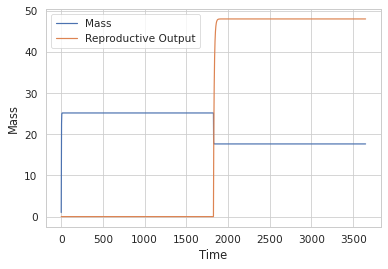

In [4]:
import matplotlib.pyplot as plt
import Functions as F
m0 = 1**-3 #1mg#10**-4 #1g
R0 = 0
time = 365*10 #10**6
shrinkage = 0.3
resolution = 0.01
c_vec = around(arange(0, 0.4, resolution), decimals=4)
rho_vec = around(arange(0, 2, resolution), decimals=4)

params = {"alpha" : 365*5, "epsilon" : 0.7,
          "norm_const" : None, "meta_prop" : None, "meta_exp" : 1,
          "c" : 0.02, "rho" : 1.92, 
          "Xr" : 100, "amp" : 0, "period" : 365, "dimensionality" : "2D"
}

F.plot_supply(m0, R0,time, params)


array([[1.00000000e+00, 0.00000000e+00],
       [1.05904806e+04, 0.00000000e+00],
       [4.34620487e+04, 0.00000000e+00],
       ...,
       [7.75823323e+04, 2.05862451e+05],
       [7.75823323e+04, 2.05862451e+05],
       [7.75823323e+04, 2.05862451e+05]])

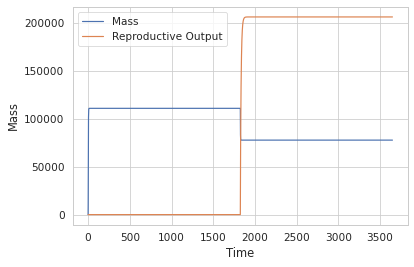

In [5]:
params = {"alpha" : 365*5, "epsilon" : 0.7,
          "norm_const" : None, "meta_prop" : None, "meta_exp" : 1,
          "c" : 0.16, "rho" : 1.05, 
          "Xr" : 100, "amp" : 0, "period" : 365, "dimensionality" : "3D"
}

F.plot_supply(m0, R0,time, params)
